## Supervised Learning
### Logistic Regression

## X Education
### Problem Statement:
X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines and generates numerous leads, however the lead conversion rate is very poor. The company wishes to increase its lead conversion rate by identifying the potential leads.

### Solution:
Building a predictive logistic regression model which can identify potential leads and assign lead scores for each leads. Such that higher lead scores have higher conversion chance and lower lead scores have less conversion chance.

### Approach:
- EDA: Exploratory Data Analysis.
- Preparing the data for modeling.
- Training the model.
- Model Evaluation.
- Prediction on test data.

In [166]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [167]:
# Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

In [288]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

In [168]:
# Setting the visual preferance.
# Note: Use jupyter 'Onedork' theme for better appearance.
plt.style.use('dark_background')
%matplotlib inline
pd.set_option('max_columns', 50)

## Task 1: EDA - Exploratory Data Analysis
- ### Subtask 1.1: Read and understant the data

In [169]:
df = pd.read_csv('C:/demo/Assignment/ML/Logistic_Regression/Lead Scoring/Leads.csv')

In [170]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [171]:
df.shape

(9240, 37)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [173]:
df.duplicated().sum()

0

##### Explanation:
The data set does not have duplicate values, but has a lot of categorical variables and missing values. Both has to be treated before building a model.

- ### Subtask 1.2: Missing values

In [174]:
# Identifying Missing values.
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [175]:
# Removing the columns with high percentage of Null values. (> 35%)
to_drop = ['Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index',
           'Asymmetrique Activity Index', 'Lead Quality', 'Tags']
df = df.drop(df[to_drop], axis = 1)

In [176]:
# General removal of rows which has more than 5 columns missing.
round(len(df[df.isnull().sum(axis = 1) > 5])/len(df.index)*100,2)

15.32

In [177]:
df = df[df.isnull().sum(axis = 1) <= 5]

In [178]:
# Checking the remaining percenrage of data left.
round(len(df.index)/9240*100,2)

84.68

In [179]:
# Treating the column 'Specialization'
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [180]:
# Replacing the category 'Select' and missing values with 'Other'.
df['Specialization'].replace('Select', 'Other', inplace = True)
df.loc[pd.isnull(df['Specialization']), ['Specialization']] = 'Other'

In [181]:
df['Specialization'].value_counts()

Other                                1965
Finance Management                    976
Human Resource Management             848
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [182]:
df['City'].value_counts()

Mumbai                         3218
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     453
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [183]:
# Notice that there is select category present in other columns too . These values are equal to null values.
df.replace('Select', np.nan, inplace = True)
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.46
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.66
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.66
Last Activity                                     1.32
Country                                          20.63
Specialization                                    0.00
How did you hear about X Education               74.57
What is your current occupation                  16.28
What matters most to you in choosing a course    16.53
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [184]:
# Dropping columns which has high percentage of missing values
df = df.drop(['How did you hear about X Education', 'Lead Profile', 'City'], axis = 1)

- ### Subtask 1.3: Imputation of Missing values

In [185]:
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.46
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.66
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.66
Last Activity                                     1.32
Country                                          20.63
Specialization                                    0.00
What is your current occupation                  16.28
What matters most to you in choosing a course    16.53
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [186]:
df['TotalVisits'].describe()

count    7694.000000
mean        3.795165
std         5.079495
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [187]:
# Since there is outliers present in 'TotalVisits' imputing missing values with 'Median'
df.loc[pd.isnull(df['TotalVisits']), ['TotalVisits']] = df['TotalVisits'].median()

In [188]:
df['Page Views Per Visit'].describe()

count    7694.000000
mean        2.613225
std         2.151810
min         0.000000
25%         1.330000
50%         2.000000
75%         4.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [189]:
# Since there is outliers present in 'Page Views Per Visit' imputing missing values with 'Median'
df.loc[pd.isnull(df['Page Views Per Visit']), ['Page Views Per Visit']] = df['Page Views Per Visit'].median()

In [190]:
df['Country'].value_counts()

India                   5948
United States             58
United Arab Emirates      51
Singapore                 24
Saudi Arabia              21
United Kingdom            14
Australia                 12
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               3
Sweden                     3
Philippines                2
Belgium                    2
Bangladesh                 2
China                      2
Uganda                     2
Netherlands                2
Italy                      1
Indonesia                  1
Ghana                      1
Liberia                    1
Vietnam                    1
Russia                     1
Malaysia                   1
Kenya                      1
Denmark                    1
Tanzania                   1
Switzerland   

In [191]:
# Imputing the categorical column 'Country' with the mode value.
df.loc[pd.isnull(df['Country']), ['Country']] = 'India'

In [192]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [193]:
df.loc[pd.isnull(df['What is your current occupation']), ['What is your current occupation']] = 'Unemployed'

- ### Subtask 1.4: Data Cleaning


#### Highly skewed

In [194]:
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.46
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     1.32
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    16.53
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [195]:
df['Digital Advertisement'].value_counts()

No     7820
Yes       4
Name: Digital Advertisement, dtype: int64

In [196]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [197]:
skewed = ['I agree to pay the amount through cheque', 'Get updates on DM Content',
          'Update me on Supply Chain Content', 'Receive More Updates About Our Courses', 
          'Through Recommendations', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 
          'Newspaper Article', 'Magazine', 'Search', 'What matters most to you in choosing a course', 
          'Do Not Call']
df = df.drop(df[skewed], axis = 1)

##### Explanation:
There are few columns in the data set which has high skewness towards one category alone. (ex: Digital Advertisement) These columns are redundant. These columns will not be contributing much to the model, hence these columns can be removed.

#### Similar columns

In [198]:
df['Last Activity'].value_counts()

Email Opened                    2996
SMS Sent                        2549
Page Visited on Website          569
Olark Chat Conversation          463
Converted to Lead                354
Email Bounced                    279
Email Link Clicked               205
Form Submitted on Website        115
Unreachable                       89
Unsubscribed                      54
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       5
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [199]:
df['Last Notable Activity'].value_counts()

Modified                        2642
Email Opened                    2487
SMS Sent                        2058
Page Visited on Website          274
Email Link Clicked               129
Olark Chat Conversation           88
Email Bounced                     57
Unsubscribed                      40
Unreachable                       29
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [200]:
similar = ['Last Activity', 'Lead Source']
df = df.drop(df[similar], axis = 1)

##### Explanation:
Few columns in the data set are similar to each other (ex: Last Activity and Last Notable Activity) these columns will have high corelation between them. Hence eiher of the columns should be removed.

In [201]:
round(df.isnull().sum()/len(df.index)*100,2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

- ### Subtask 1.5: Outliers

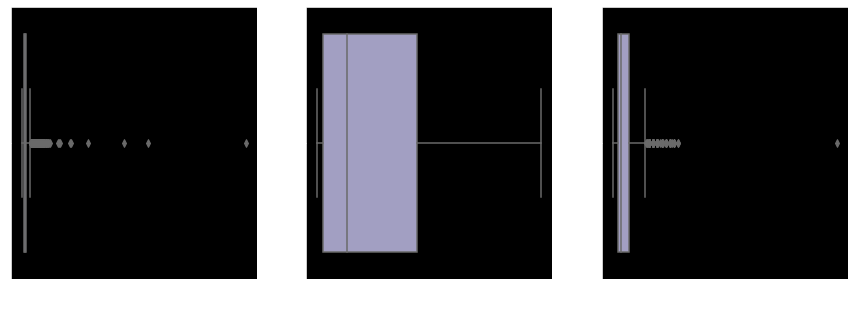

In [202]:
var = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = (15,5))
for x in enumerate(var):
    plt.subplot(1,3,x[0]+1)
    sns.boxplot(x = x[1], data = df, palette = 'Purples')
plt.show()

In [203]:
df['TotalVisits'].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99])

count    7824.000000
mean        3.781953
std         5.038139
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [204]:
df.loc[df['TotalVisits'] > df['TotalVisits'].quantile(0.99), ['TotalVisits']] = df['TotalVisits'].quantile(0.99)

In [205]:
df['Page Views Per Visit'].quantile([0.25,0.50,0.75,0.90,0.95,0.99])

0.25    1.33
0.50    2.00
0.75    4.00
0.90    5.00
0.95    6.00
0.99    9.00
Name: Page Views Per Visit, dtype: float64

In [206]:
df.loc[df['Page Views Per Visit'] > df['Page Views Per Visit'].quantile(0.99), 
       ['Page Views Per Visit']] = df['Page Views Per Visit'].quantile(0.99)

##### Explanation:
Outliers treatment is a mandatory step before building the model. Also Logistic Regression is sensitive to outliers. The ouliers have been capped to the 99th percentile.

- ### Subtask 1.6: Univariate Analysis

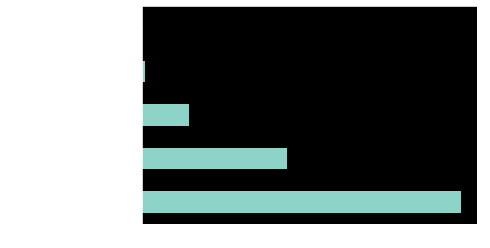

In [207]:
df['Lead Origin'].value_counts().plot.barh()
plt.show()

##### Explanation: 
The more number of leads are generated through 'Landing Page Submission' followed by 'API'

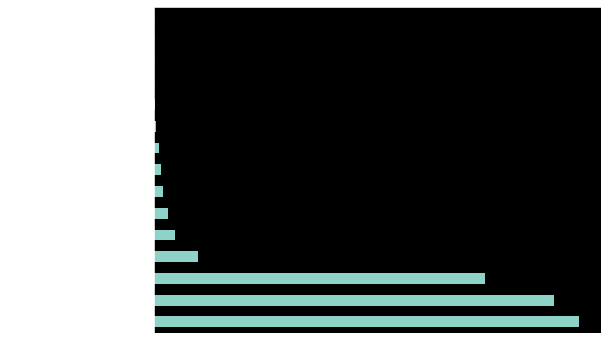

In [208]:
plt.figure(figsize = (8,6))
df['Last Notable Activity'].value_counts().plot.barh()
plt.show()

##### Explanation:
Majority of leads have shown interest by either opening the e-mail, modifing cerntain information or by sending an sms for enquire. This is a positive sign for lead conversion.

- ### Subtask 1.7: Bivariate Analysis

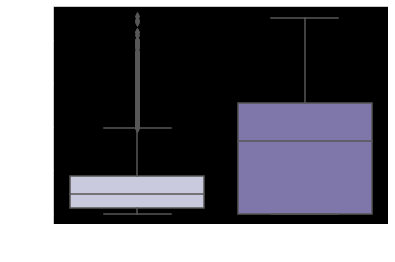

In [209]:
sns.boxplot(x = df['Converted'], y = df['Total Time Spent on Website'], palette = 'Purples')
plt.show()

##### Explanation:
On an average leads who are more likely to get converted spend more time on the website than the leads who are not likey to get converted. So this is one of the important varibale to include in modeling.

## Task 2: Preparing the data for modeling
- ### Subtask 2.1: Feature Engineering

In [210]:
df['Country'].value_counts()

India                   7562
United States             58
United Arab Emirates      51
Singapore                 24
Saudi Arabia              21
United Kingdom            14
Australia                 12
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
Germany                    4
Nigeria                    4
Canada                     4
Kuwait                     4
South Africa               3
Sweden                     3
Philippines                2
Belgium                    2
Bangladesh                 2
China                      2
Uganda                     2
Netherlands                2
Italy                      1
Indonesia                  1
Ghana                      1
Liberia                    1
Vietnam                    1
Russia                     1
Malaysia                   1
Kenya                      1
Denmark                    1
Tanzania                   1
Switzerland   

In [211]:
df['Indian'] = df['Country'].apply(lambda x: 1 if x == 'India' else 0)
df.drop('Country', axis = 1, inplace = True)
df['Indian'].value_counts()

1    7562
0     262
Name: Indian, dtype: int64

In [212]:
df['What is your current occupation'].value_counts()

Unemployed              6874
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [213]:
work = ['Working Professional', 'Businessman', 'Other']
df['Working'] = df['What is your current occupation'].apply(lambda x: 1 if x in work else 0)
df = df.drop('What is your current occupation', axis = 1)
df['Working'].value_counts()

0    7094
1     730
Name: Working, dtype: int64

##### Explanation:
The above two variables had many categories, these were converted into binary variable based on the nature of their categories. Below is the indication of what they mean:
- Indian = 1 if a person is an Indian and 0 if he is a foreigner.
- Working = 1 indicates if a person has job and 0 indicates if a person is unemployed.

In [214]:
df['Specialization'].value_counts()

Other                                1965
Finance Management                    976
Human Resource Management             848
Marketing Management                  837
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [215]:
Management = ['Finance Management', 'Human Resource Management', 'Marketing Management', 
              'Operations Management','IT Projects Management', 
              'Supply Chain Management', 'Healthcare Management', 'Hospitality Management', 
              'Hospitality Management', 'Retail Management']
Commerce = ['Banking, Investment And Insurance', 'International Business', 'E-COMMERCE', 
            'E-Business', 'Business Administration']
Others = ['Other', 'Media and Advertising', 'Travel and Tourism', 'Rural and Agribusiness', 
          'Services Excellence']

In [216]:
df['Specialisation'] = df['Specialization'].apply(lambda x: 'Management' if x in Management else 'Commerce' if x in Commerce else 'Others')
df = df.drop('Specialization', axis = 1)
df['Specialisation'].value_counts()

Management    4252
Others        2484
Commerce      1088
Name: Specialisation, dtype: int64

In [217]:
df['Last Notable Activity'].value_counts()

Modified                        2642
Email Opened                    2487
SMS Sent                        2058
Page Visited on Website          274
Email Link Clicked               129
Olark Chat Conversation           88
Email Bounced                     57
Unsubscribed                      40
Unreachable                       29
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [218]:
Email = ['Email Opened', 'Email Link Clicked', 'Email Received']
Phone = ['SMS Sent', 'Had a Phone Conversation']
Website = ['Modified', 'Page Visited on Website', 'Olark Chat Conversation', 
           'View in browser link Clicked', 'Form Submitted on Website']
Other = ['Email Bounced', 'Unsubscribed', 'Unreachable', 'Email Marked Spam', 'Approached upfront']

In [219]:
df['Activity'] = df['Last Notable Activity'].apply(lambda x: 'Email' if x in Email else 'Phone' if x in Phone else 'Website' if x in Website else 'Other')
df = df.drop('Last Notable Activity', axis = 1)
df['Activity'].value_counts()

Website    3006
Email      2617
Phone      2072
Other       129
Name: Activity, dtype: int64

##### Explanation:
The Above categories in the variables are reduced to fewer categories by clubbing the similar categories together. This step was performed to reduce the no.of dummy variables which will be created to feed the model. Also the original features have been removed from the data set.

In [220]:
df.dtypes

Prospect ID                                object
Lead Number                                 int64
Lead Origin                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
A free copy of Mastering The Interview     object
Indian                                      int64
Working                                     int64
Specialisation                             object
Activity                                   object
dtype: object

- ### Subtask 2.2: Converting binary variables

In [221]:
binary = ['Do Not Email', 'A free copy of Mastering The Interview']
df[binary] = df[binary].apply(lambda x: x.map({'Yes':1, 'No': 0}))

In [223]:
df['Do Not Email'].value_counts()

0    7182
1     642
Name: Do Not Email, dtype: int64

In [224]:
df['A free copy of Mastering The Interview'].value_counts()

0    4937
1    2887
Name: A free copy of Mastering The Interview, dtype: int64

##### Explanation:
All the binary variables are converted into 0 and 1. As 1 indiacted yes and 0 indicates no

- ### Subtask 2.3: Dummy variables

In [225]:
dummy = pd.get_dummies(df[['Lead Origin', 'Specialisation', 'Activity']], drop_first = True)
df = pd.concat([df, dummy], axis = 1)
df = df.drop(['Lead Origin', 'Specialisation', 'Activity'], axis = 1)
df.dtypes

Prospect ID                                object
Lead Number                                 int64
Do Not Email                                int64
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
A free copy of Mastering The Interview      int64
Indian                                      int64
Working                                     int64
Lead Origin_Landing Page Submission         uint8
Lead Origin_Lead Add Form                   uint8
Lead Origin_Lead Import                     uint8
Lead Origin_Quick Add Form                  uint8
Specialisation_Management                   uint8
Specialisation_Others                       uint8
Activity_Other                              uint8
Activity_Phone                              uint8
Activity_Website                            uint8
dtype: object

##### Explanation:
The categorical variables are converted into dummy variables having each category as a new column in the data set. Also the original features have been dropped.

- ### Subtask 2.4: Train Test Split

In [262]:
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(5476, 19)
(2348, 19)


- ### Subtask 2.5: Rescalling

In [263]:
scaler = MinMaxScaler()
df_train[var] = scaler.fit_transform(df_train[var])
df_train.describe()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Indian,Working,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialisation_Management,Specialisation_Others,Activity_Other,Activity_Phone,Activity_Website
count,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000,5476.0,5476.000000,5476.000000,5476.000000,5476.000000,5476.000000
mean,616960.374909,0.085099,0.433163,0.212994,0.235513,0.285491,0.367787,0.964938,0.091125,0.618517,0.093864,0.005661,0.0,0.540723,0.324507,0.016618,0.262235,0.386048
std,23255.773648,0.279054,0.495558,0.187844,0.245779,0.217255,0.482247,0.183954,0.287813,0.485795,0.291666,0.075034,0.0,0.498384,0.468233,0.127847,0.439890,0.486886
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596666.500000,0.000000,0.000000,0.117647,0.026408,0.147778,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,614927.000000,0.000000,0.000000,0.176471,0.129842,0.222222,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,637216.500000,0.000000,1.000000,0.294118,0.445973,0.444444,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,660737.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


##### Explanation:
Variables transformation is a very vital step before building any ML algorithm.
- It helps in faster computation.
- If all the variables are in same unit, then it is easier to interpret the values in the model.

In [264]:
# Checking the Imbalance percentage.
round(sum(df['Converted'])/len(df.index)*100, 2)

43.58

- ### Subtask 2.5: Correlation and Heatmap

In [265]:
df_train.corr()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Indian,Working,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Specialisation_Management,Specialisation_Others,Activity_Other,Activity_Phone,Activity_Website
Lead Number,1.000000,-0.105756,0.050521,0.027125,0.011665,0.046114,-0.120292,0.044618,-0.020578,-0.083333,0.039375,0.103653,NaN,-0.058919,0.055460,-0.000831,-0.169855,0.052550
Do Not Email,-0.105756,1.000000,-0.167547,-0.005193,-0.067197,0.006916,0.067335,-0.048608,-0.057909,0.100741,-0.033080,-0.014289,NaN,-0.005223,0.003886,0.334086,-0.037498,0.148011
Converted,0.050521,-0.167547,1.000000,-0.033674,0.330565,-0.093123,-0.101183,0.050425,0.305872,-0.179904,0.317630,-0.021751,NaN,0.044671,-0.035997,-0.018502,0.317535,-0.247316
TotalVisits,0.027125,-0.005193,-0.033674,1.000000,0.273434,0.679522,0.244862,-0.020767,-0.018248,0.381477,-0.301830,-0.052024,NaN,0.140878,-0.216497,-0.007830,-0.029204,-0.018275
Total Time Spent on Website,0.011665,-0.067197,0.330565,0.273434,1.000000,0.288108,0.132069,-0.012174,0.086035,0.225150,-0.179476,-0.053529,NaN,0.150530,-0.185131,-0.003374,0.085300,-0.081795
Page Views Per Visit,0.046114,0.006916,-0.093123,0.679522,0.288108,1.000000,0.243526,-0.018896,-0.034738,0.486071,-0.355588,-0.059324,NaN,0.178027,-0.268093,0.000448,0.014254,-0.068982
A free copy of Mastering The Interview,-0.120292,0.067335,-0.101183,0.244862,0.132069,0.243526,1.000000,-0.124327,-0.024379,0.521817,-0.232496,-0.057550,NaN,0.243930,-0.335327,0.010462,-0.011315,-0.029172
Indian,0.044618,-0.048608,0.050425,-0.020767,-0.012174,-0.018896,-0.124327,1.000000,0.001711,-0.094518,0.057947,0.014383,NaN,-0.060128,0.066384,0.001481,0.016588,-0.001792
Working,-0.020578,-0.057909,0.305872,-0.018248,0.086035,-0.034738,-0.024379,0.001711,1.000000,-0.055702,0.170065,-0.006976,NaN,0.137748,-0.150345,0.003513,0.119949,-0.072519
Lead Origin_Landing Page Submission,-0.083333,0.100741,-0.179904,0.381477,0.225150,0.486071,0.521817,-0.094518,-0.055702,1.000000,-0.409818,-0.096077,NaN,0.403277,-0.559756,0.005043,-0.013838,-0.036715


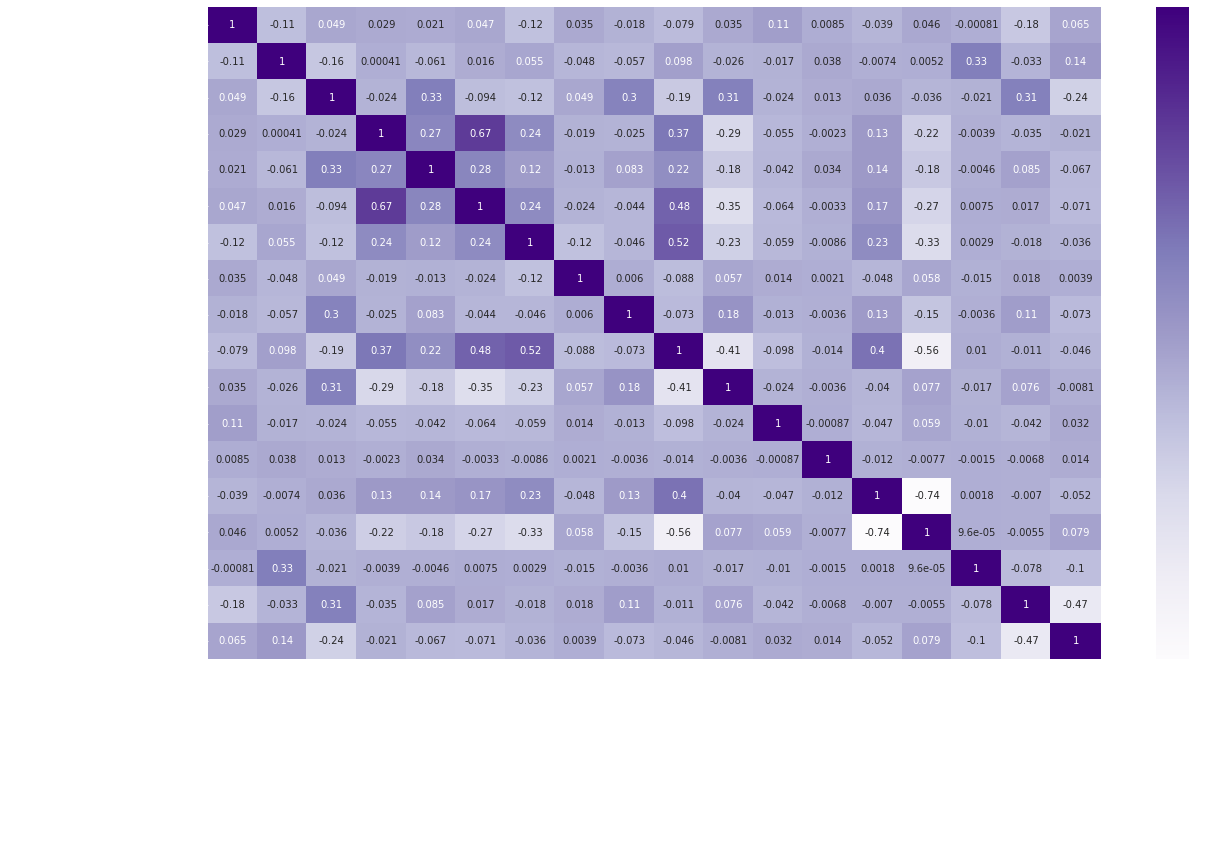

In [266]:
# Heatmap
plt.figure(figsize = (20,12))
heat = sns.heatmap(df.corr(), annot = True, cmap = 'Purples')
down, up = heat.get_ylim()
heat.set_ylim(down+0.5, up-0.5)
plt.show()

##### Explanation:
Few variables have high correlation between them. However all the variables will be fed to the model and later dropped if the VIF score is high.

In [267]:
edu = df_train.drop(['Prospect ID', 'Lead Number'], axis = 1)
edu.shape

(5476, 17)

## Task 3: Training the Model
- ### Subtask 3.1: RFE - Recursive Feature Elimination

In [268]:
# Assigning X and Y
Y_train = edu.pop('Converted')
X_train = edu

In [269]:
log_reg = LogisticRegression()
rfe = RFE(log_reg, 13)
rfe_model = rfe.fit(X_train, Y_train)

In [270]:
# Ranking of variables as per RFE
pd.DataFrame(zip(X_train.columns, rfe_model.ranking_)).sort_values(by = 1, ascending = True)

,0,1
0,Do Not Email,1
1,TotalVisits,1
2,Total Time Spent on Website,1
3,Page Views Per Visit,1
4,A free copy of Mastering The Interview,1
5,Indian,1
6,Working,1
7,Lead Origin_Landing Page Submission,1
8,Lead Origin_Lead Add Form,1
12,Specialisation_Others,1


In [271]:
col = X_train.columns[rfe_model.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Indian', 'Working', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Specialisation_Others', 'Activity_Other',
       'Activity_Phone', 'Activity_Website'],
      dtype='object')

- ### Subtask 3.2: Stats Models
 - Note: Assuming alpha to be 0.05 with 95% of confidence interval
 - Note: Assuming permitable VIF level to be <5

In [272]:
X_train_sm = sm.add_constant(X_train[col])
log_model = sm.GLM(Y_train, X_train_sm, families = sm.families.Binomial()).fit()
print(log_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5476
Model:                            GLM   Df Residuals:                     5462
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.14902
Method:                          IRLS   Log-Likelihood:                -2550.8
Date:                Sun, 19 Jul 2020   Deviance:                       813.95
Time:                        09:44:47   Pearson chi2:                     814.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

In [275]:
vif = pd.DataFrame()
vif['Features'] = col
vif['VIF'] = [variance_inflation_factor(X_train[col].values, x) for x in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,Indian,8.21
3,Page Views Per Visit,5.87
7,Lead Origin_Landing Page Submission,5.74
1,TotalVisits,4.38
12,Activity_Website,2.20
2,Total Time Spent on Website,2.19
4,A free copy of Mastering The Interview,2.19
9,Specialisation_Others,2.15
11,Activity_Phone,1.81
8,Lead Origin_Lead Add Form,1.43


In [276]:
X_2 = X_train[col].drop('A free copy of Mastering The Interview', axis = 1)
X_2_sm = sm.add_constant(X_2)
log_model_2 = sm.GLM(Y_train, X_2_sm, families = sm.families.Binomial()).fit()
print(log_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5476
Model:                            GLM   Df Residuals:                     5463
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.14904
Method:                          IRLS   Log-Likelihood:                -2551.7
Date:                Sun, 19 Jul 2020   Deviance:                       814.20
Time:                        09:53:14   Pearson chi2:                     814.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [277]:
vif = pd.DataFrame()
vif['Features'] = X_2.columns
vif['VIF'] = [variance_inflation_factor(X_2.values, x) for x in range(X_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Indian,8.20
3,Page Views Per Visit,5.85
6,Lead Origin_Landing Page Submission,4.79
1,TotalVisits,4.34
11,Activity_Website,2.20
2,Total Time Spent on Website,2.19
8,Specialisation_Others,2.15
10,Activity_Phone,1.81
7,Lead Origin_Lead Add Form,1.43
0,Do Not Email,1.33


In [278]:
X_3 = X_2.drop('Indian', axis = 1)
X_3_sm = sm.add_constant(X_3)
log_model_3 = sm.GLM(Y_train, X_3_sm, families = sm.families.Binomial()).fit()
print(log_model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5476
Model:                            GLM   Df Residuals:                     5464
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.14912
Method:                          IRLS   Log-Likelihood:                -2553.6
Date:                Sun, 19 Jul 2020   Deviance:                       814.77
Time:                        09:55:49   Pearson chi2:                     815.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [279]:
vif = pd.DataFrame()
vif['Features'] = X_3.columns
vif['VIF'] = [variance_inflation_factor(X_3.values, x) for x in range(X_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.69
1,TotalVisits,4.32
5,Lead Origin_Landing Page Submission,3.68
2,Total Time Spent on Website,2.12
10,Activity_Website,1.95
9,Activity_Phone,1.69
7,Specialisation_Others,1.51
0,Do Not Email,1.32
6,Lead Origin_Lead Add Form,1.22
8,Activity_Other,1.20


In [280]:
X_4 = X_3.drop('TotalVisits', axis = 1)
X_4_sm = sm.add_constant(X_4)
log_model_4 = sm.GLM(Y_train, X_4_sm, families = sm.families.Binomial()).fit()
print(log_model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5476
Model:                            GLM   Df Residuals:                     5465
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.14953
Method:                          IRLS   Log-Likelihood:                -2561.7
Date:                Sun, 19 Jul 2020   Deviance:                       817.19
Time:                        10:01:07   Pearson chi2:                     817.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [281]:
vif = pd.DataFrame()
vif['Features'] = X_4.columns
vif['VIF'] = [variance_inflation_factor(X_4.values, x) for x in range(X_4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,Lead Origin_Landing Page Submission,3.63
2,Page Views Per Visit,3.56
1,Total Time Spent on Website,2.09
9,Activity_Website,1.94
8,Activity_Phone,1.69
6,Specialisation_Others,1.51
0,Do Not Email,1.32
5,Lead Origin_Lead Add Form,1.22
7,Activity_Other,1.20
3,Working,1.18


In [286]:
# Predicting using the log_model_4
Y_train_pred = log_model_4.predict(X_4_sm)
train = pd.DataFrame()
train['Prospect ID'] = df_train['Prospect ID'].values
train['Converted'] = Y_train.values
train['Score'] = Y_train_pred.values
train.head()

,Prospect ID,Converted,Score
0,b20e6cce-378d-42cf-8575-8278f26616e2,0,0.126992
1,e89bab68-d8cf-4844-82bf-66dd87ce03f1,0,0.207414
2,0201d731-7b43-477b-8d0f-4e018615c548,1,1.002673
3,8e00d156-a96e-4861-aa15-ed6b248e8235,1,0.935232
4,33074f07-98eb-4193-9c75-fe317a088f8e,0,0.682363


##### Explanation
log_model_4 is the final model. The P value for all the features is less than 0.05 (< 0.05) which makes all the features significant in the model. Also the VIF scores for these variables is less than 5. Which means that the features are independant and there is no multicollinearity between them.

## Task 4: Model Evaluation
- ### Subtask 4.1: Finding the Optimal Thrushold

In [290]:
cutoff = pd.DataFrame()
cutoff['Converted'] = Y_train.values
cutoff['Score'] = Y_train_pred.values
num = [float(x)/10 for x in range(10)]
for x in num:
    cutoff[x] = cutoff['Score'].map(lambda i: 1 if i > x else 0)
cutoff.head()

,Converted,Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.126992,1,1,0,0,0,0,0,0,0,0
1,0,0.207414,1,1,1,0,0,0,0,0,0,0
2,1,1.002673,1,1,1,1,1,1,1,1,1,1
3,1,0.935232,1,1,1,1,1,1,1,1,1,1
4,0,0.682363,1,1,1,1,1,1,1,0,0,0


In [291]:
limits = pd.DataFrame(columns = ['Probability', 'Accuracy', 'Sensitivity', 'FPR', 'Specificity', 'FNR'])
for x in num:
    matrix = metrics.confusion_matrix(cutoff['Converted'], cutoff[x])
    total = sum(sum(matrix))
    Accuracy = (matrix[0,0]+matrix[1,1])/total
    Sensitivity = matrix[1,1]/(matrix[1,1]+matrix[1,0])
    FPR = matrix[0,1]/(matrix[0,1]+matrix[0,0])
    Specificity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    FNR = matrix[1,0]/(matrix[1,0]+matrix[1,1])
    limits.loc[x] = [x, Accuracy, Sensitivity, FPR, Specificity, FNR]

In [293]:
limits

,Probability,Accuracy,Sensitivity,FPR,Specificity,FNR
0.0,0.0,0.470599,0.999157,0.933312,0.066688,0.000843
0.1,0.1,0.525383,0.986931,0.827320,0.172680,0.013069
0.2,0.2,0.671110,0.946880,0.539626,0.460374,0.053120
0.3,0.3,0.768444,0.887858,0.322809,0.677191,0.112142
0.4,0.4,0.791819,0.813659,0.224871,0.775129,0.186341
0.5,0.5,0.791636,0.682968,0.125322,0.874678,0.317032
0.6,0.6,0.766070,0.560287,0.076675,0.923325,0.439713
0.7,0.7,0.730095,0.432125,0.042204,0.957796,0.567875
0.8,0.8,0.681519,0.288364,0.018041,0.981959,0.711636
0.9,0.9,0.651936,0.208685,0.009343,0.990657,0.791315


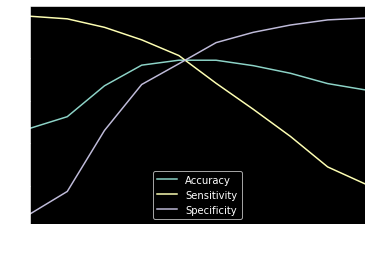

In [301]:
limits.plot.line(x = 'Probability', y = ['Accuracy', 'Sensitivity', 'Specificity'])
plt.show()

##### Explanation
The Ouptimal Thrushold limit is a point where 'Accuracy', 'Sensitivity' and 'Specificity are fairly decent and almost equal. It is usually the intersection point on the graph. Hence the optimal thrushold limit is 0.4

- ### Subtask 4.2: ROC - Receiver operating characteristic Curve

In [302]:
def roc (actual, prob):
    FPR, TPR, threshold = metrics.roc_curve(actual, prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, prob)
    plt.plot(FPR, TPR, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.legend(loc = 'lowwer right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.show()
    return None

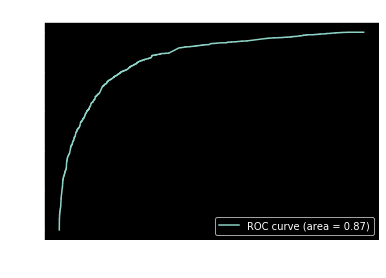

In [303]:
FPR, TPR, threshold = metrics.roc_curve(cutoff['Converted'], cutoff['Score'], drop_intermediate = False)
roc(cutoff['Converted'], cutoff['Score'])

##### Explanation
The model has achieved the ROC score of 0.87 and also from the above graph we can observe that the curve is hugging the TPR. This means that the model is able to identify the lead conversions correctly by reduce the FPR.

#### Problem Statement 2
X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads to be converted and hence, want to make phone calls to as much of such people as possible.

In [305]:
limits.loc[limits['Probability'] == 0.3]

,Probability,Accuracy,Sensitivity,FPR,Specificity,FNR
0.3,0.3,0.768444,0.887858,0.322809,0.677191,0.112142


In [307]:
test['Max Leads'] = test['Score'].map(lambda x: 1 if x > 0.3 else 0)
test.head()

,Prospect ID,Converted,Score,Max Leads
0,b20e6cce-378d-42cf-8575-8278f26616e2,0,0.126992,0
1,e89bab68-d8cf-4844-82bf-66dd87ce03f1,0,0.207414,0
2,0201d731-7b43-477b-8d0f-4e018615c548,1,1.002673,1
3,8e00d156-a96e-4861-aa15-ed6b248e8235,1,0.935232,1
4,33074f07-98eb-4193-9c75-fe317a088f8e,0,0.682363,1


In [308]:
test['Max Leads'].value_counts()

1    3108
0    2368
Name: Max Leads, dtype: int64

##### Explanation
At thrushold of 0.3 the model is able to predict the maximum potential leads with an Accuracy = 0.77, Sensitivity = 0.89 and  Specificity = 0.68

#### Problem Statement 3
Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [309]:
limits.loc[limits['Probability'] == 0.5]

,Probability,Accuracy,Sensitivity,FPR,Specificity,FNR
0.5,0.5,0.791636,0.682968,0.125322,0.874678,0.317032


In [310]:
test['Hot Leads'] = test['Score'].map(lambda x: 1 if x > 0.5 else 0)
test.head()

,Prospect ID,Converted,Score,Max Leads,Hot Leads
0,b20e6cce-378d-42cf-8575-8278f26616e2,0,0.126992,0,0
1,e89bab68-d8cf-4844-82bf-66dd87ce03f1,0,0.207414,0,0
2,0201d731-7b43-477b-8d0f-4e018615c548,1,1.002673,1,1
3,8e00d156-a96e-4861-aa15-ed6b248e8235,1,0.935232,1,1
4,33074f07-98eb-4193-9c75-fe317a088f8e,0,0.682363,1,1


In [311]:
test['Hot Leads'].value_counts()

0    3467
1    2009
Name: Hot Leads, dtype: int64

##### Explanation:
At thrushold of 0.5 the model is able to predict the hot leads which have high conversion rate. Also it achieves the Accuracy = 0.79, Sensitivity = 0.69, FPR = 0.12 and with Specificity = 0.87

## Task 5: Prediction on Test data
- ### Subtask 5.1: Prediction

In [312]:
# Rescalling of the Test data
df_test[var] = scaler.transform(df_test[var])

In [314]:
xedu = df_test.drop(['Prospect ID', 'Lead Number'], axis = 1)
Y_test = xedu.pop('Converted')
X_test = xedu

In [315]:
# Matching with log_model_4 columns
cols = X_4.columns
X_test = X_test[cols]

In [316]:
# Predicting the test data
X_test_sm = sm.add_constant(X_test)
Y_test_pred = log_model_4.predict(X_test_sm)

In [318]:
test = pd.DataFrame()
test['Prospect ID'] = df_test['Prospect ID'].values
test['Converted'] = Y_test.values
test['Score'] = Y_test_pred.values
test['Max Lead'] = test['Score'].map(lambda x: 1 if x >= 0.3 else 0)
test['Hot Lead'] = test['Score'].map(lambda x: 1 if x >= 0.5 else 0)
test.head()

,Prospect ID,Converted,Score,Max Lead,Hot Lead
0,3e3dad74-fbb0-4b98-8a0d-a391383cd599,0,0.407719,1,0
1,b967b0c5-e38d-4d25-9f68-ccea5a003ad1,0,0.146632,0,0
2,82c002cd-71fb-45c0-b256-94b9488ad8bd,1,0.540112,1,1
3,7f3cc8e2-2220-4cb0-8341-e0d9101f7465,0,0.043211,0,0
4,267dbbf0-4cb3-4322-8f38-6520ed556883,1,0.390324,1,0


- ### Subtask 5.2: Evaluation

#### Max Lead

In [319]:
con = metrics.confusion_matrix(test['Converted'], test['Max Lead'])
con

array([[875, 435],
       [120, 918]], dtype=int64)

In [320]:
print(metrics.accuracy_score(test['Converted'], test['Max Lead']))

0.7636286201022147


In [321]:
sensitivity = con[1,1]/(con[1,1]+con[1,0])
sensitivity

0.884393063583815

In [322]:
Specificity = con[0,0]/ (con[0,0]+con[0,1])
Specificity

0.6679389312977099

In [325]:
limits.loc[limits['Probability'] == 0.3]

,Probability,Accuracy,Sensitivity,FPR,Specificity,FNR
0.3,0.3,0.768444,0.887858,0.322809,0.677191,0.112142


#### Hot Lead

In [326]:
con = metrics.confusion_matrix(test['Converted'], test['Hot Lead'])
con

array([[1118,  192],
       [ 343,  695]], dtype=int64)

In [327]:
print(metrics.accuracy_score(test['Converted'], test['Hot Lead']))

0.7721465076660988


In [328]:
sensitivity = con[1,1]/(con[1,1]+con[1,0])
sensitivity

0.6695568400770713

In [329]:
Specificity = con[0,0]/ (con[0,0]+con[0,1])
Specificity

0.8534351145038168

In [330]:
limits.loc[limits['Probability'] == 0.5]

,Probability,Accuracy,Sensitivity,FPR,Specificity,FNR
0.5,0.5,0.791636,0.682968,0.125322,0.874678,0.317032


##### Explanation
The model is also performing well on the Test data. This ensures stability of the model.